**LOAD DATASET**


> Loading the dataset form Tensorflow Datasets


In [3]:
import tensorflow_datasets as tfds

ds = tfds.load('so2sat', split = ('train', 'validation'), batch_size = -1)



**Libraries**


> Importing all required Libraries



In [ ]:
pip install visualkeras

In [5]:
import sys
import numpy as np
import visualkeras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Spliting and Visualizing**


> Spliting data into test and validation and visualizing the data



In [6]:
def load_dataset():
  train = ds[0]
  test = ds[1]
  
  X_train = np.asarray(train['image'])
  Y_train = np.asarray(train['label'])
  
  x_test = np.asarray(test['image'])
  y_test = np.asarray(test['label'])
  
  for i in range(9):
    # define subplot
    plt.subplot(330+1+i)
    # plot raw pixel data
    plt.imshow(X_train[i])
    print(Y_train[i])
    # show the figure
    plt.show()


  print(X_train.shape, Y_train.shape)
  print(x_test.shape, y_test.shape)
  
  return (X_train,Y_train,x_test,y_test)

**Normalization**


> Normalizing Image Pixels in range between 0-1



In [7]:
def Normalization(Data):
	Normalized_Data = Data.astype('float32')
	Normalized_Data = Normalized_Data / 255.0
	return Normalized_Data

**CNN Model**


> CNN Model acording to my Registration number 


> Name: Muhammad Uzair Memon


> Reg #: 364045


> Reverse Reg #: 540463


> Convert to Odd: 551573




In [8]:
def CNN_model():
  # Reg # 364045   -------   375155
  CNN = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(128, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(17, activation='softmax')
  ])
  
  CNN.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return CNN


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

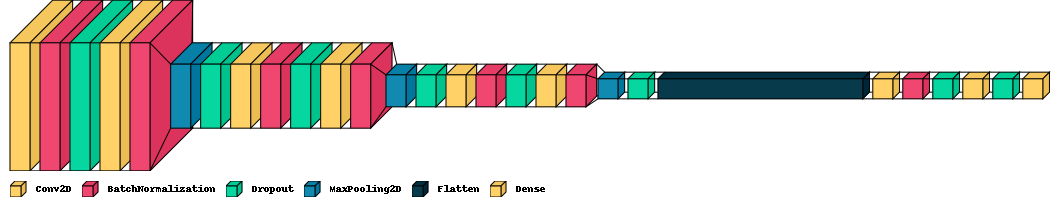

In [9]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Satalite.h5', verbose=1, save_best_only=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)
CNN = CNN_model()
CNN.summary()

visualkeras.layered_view(CNN, legend=True)

**Plots**


> Plotting Model Accuracies per epoch



In [10]:

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(131)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(133)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.show()



**Model Training**


1


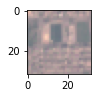

12


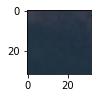

9


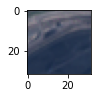

16


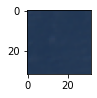

1


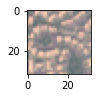

9


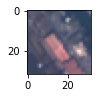

3


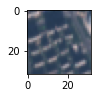

16


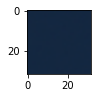

8


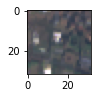

(352366, 32, 32, 3) (352366,)
(24119, 32, 32, 3) (24119,)
Epoch 1/5
173/173 [==============================] - 206s 1s/step - loss: 2.3037 - accuracy: 0.3215 - val_loss: 4.4593 - val_accuracy: 0.1139
Epoch 2/5
173/173 [==============================] - 180s 1s/step - loss: 1.5477 - accuracy: 0.5066 - val_loss: 4.1505 - val_accuracy: 0.0790
Epoch 3/5
173/173 [==============================] - 178s 1s/step - loss: 1.3303 - accuracy: 0.5667 - val_loss: 3.4081 - val_accuracy: 0.1369
Epoch 4/5
173/173 [==============================] - 176s 1s/step - loss: 1.2086 - accuracy: 0.6052 - val_loss: 3.3191 - val_accuracy: 0.2390
Epoch 5/5
173/173 [==============================] - 179s 1s/step - loss: 1.1179 - accuracy: 0.6364 - val_loss: 2.6801 - val_accuracy: 0.3044


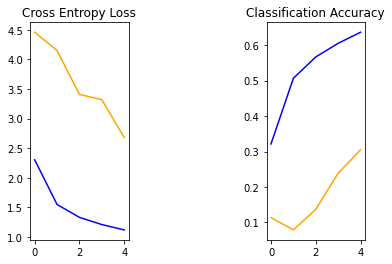

In [11]:
def run_test_harness():
	# load dataset
  X_train,Y_train,x_test,y_test = load_dataset()
	# prepare pixel data
  X_train = Normalization(X_train)
  x_test = Normalization(x_test)

  Y_train = tf.keras.utils.to_categorical(Y_train)
  y_test = tf.keras.utils.to_categorical(y_test)
  data_train = ImageDataGenerator(rescale=1/255.0, horizontal_flip = True, rotation_range=40, height_shift_range= 0.2).flow(X_train,Y_train,batch_size=2048)
  data_test = ImageDataGenerator(rescale=1/255.0).flow(x_test,y_test,batch_size=256)
   

  CNN = CNN_model()
  history = CNN.fit(data_train,epochs=5, validation_data=data_test)
  summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

**Saving**

In [ ]:
CNN.save('Model.h5') 
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('Model.h5')

In [ ]:
X_train,Y_train,x_test,y_test = load_dataset()
data_test = ImageDataGenerator(rescale=1/255.0).flow(x_test,y_test,batch_size=256)
preds = model.predict(data_test, steps=5)
label = y_test
pred = model.predict(data_test)
Prediction_index=np.argmax(pred,axis=1)

In [ ]:
Label = (data_test.class_indices)
L = dict((v,k) for k,v in Label.items())
predictions = [L[k] for k in Prediction_index]

In [ ]:
cf_report = classification_report(Prediction_index,Label)
cm = confusion_matrix(Prediction_index,Label)

print(cf_report)